In [1]:
from pynq import PL
from pynq import Overlay
from pynq import GPIO
import time
import matplotlib.pyplot as plt



In [3]:
overlay=Overlay('/home/xilinx/pynq/overlays/Pblock_test/Zynq.bit')

In [5]:
overlay.pr_download('pr_hier', '/home/xilinx/pynq/overlays/Pblock_test/pr_1.bit')

In [6]:
overlay.pr_download('pr_hier', '/home/xilinx/pynq/overlays/Pblock_test/pr_0.bit')

In [15]:
overlay=Overlay('/home/xilinx/pynq/overlays/AXI_GPIO/Zynq_wrapper.bit')

In [12]:
time1 = time.time()
overlay.pr_download('pr_hier', '/home/xilinx/pynq/overlays/Pblock_test/pr_0.bit')
time2 = time.time()
print((time2-time1))

0.20585322380065918


In [19]:
overlay.pr_download('pr_hier', '/home/xilinx/pynq/overlays/AXI_GPIO/pr_1.bit')

In [24]:
overlay.pr_download('pr_hier', '/home/xilinx/pynq/overlays/AXI_GPIO/pr_2.bit')

AttributeError: 'DefaultIP' object has no attribute 'download'

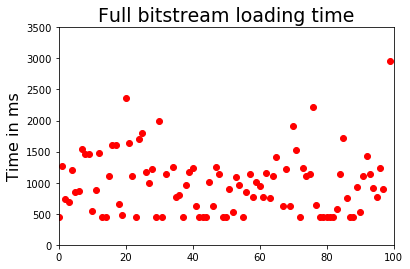

Average: 1100.8000493049622 ms


In [64]:
length = 100
time_log = []
avg = 0
for i in range(length):
    start = time.time()
    overlay=Overlay('/home/xilinx/pynq/overlays/GPIO_Wstatic/full.bit')
    end = time.time()
    time_log.append((end-start)*1000)
    avg += time_log[i]

%matplotlib inline
plt.plot(range(length), time_log, 'ro')
plt.title('Full bitstream loading time', fontsize=19)
plt.axis([0, length, 0, 3500])
plt.ylabel('Time in ms', fontsize=16)
plt.show()
print("Average: {} ms".format(avg/100))

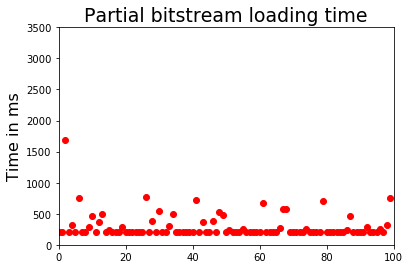

Average: 294.75043296813965 ms


In [16]:
length = 100
time_log = []
avg = 0
for i in range(length):
    start = time.time()
    if i%2 == 0:
        overlay.pr_download('pr_hier', '/home/xilinx/pynq/overlays/Pblock_test/pr_1.bit')
    else:
        overlay.pr_download('pr_hier', '/home/xilinx/pynq/overlays/Pblock_test/pr_0.bit')
    end = time.time()
    time_log.append((end-start)*1000)
    avg += time_log[i]

%matplotlib inline
plt.plot(range(length), time_log, 'ro')
plt.title('Partial bitstream loading time', fontsize=19)
plt.axis([0, length, 0, 3500])
plt.ylabel('Time in ms', fontsize=16)
plt.show()
print("Average: {} ms".format(avg/100))

In [14]:
del Overlay

In [17]:
help(overlay.pr_download)

Help on method pr_download in module pynq.overlay:

pr_download(partial_region, partial_bit, dtbo=None) method of pynq.overlay.Overlay instance
    The method to download a partial bitstream onto PL.
    
    In this method, the corresponding parser will only be
    added once the `download()` method of the hierarchical block is called.
    
    This method always uses the parameter `dtbo` to configure the device
    tree.
    
    Note
    ----
    There is no check on whether the partial region specified by users
    is really partial-reconfigurable. So users have to make sure the
    `partial_region` provided is correct.
    
    Parameters
    ----------
    partial_region : str
        The name of the hierarchical block corresponding to the PR region.
    partial_bit : str
        The name of the partial bitstream.
    dtbo : str
        The path of the dtbo file.

